In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import illustris_python.groupcat as gc

%matplotlib inline

In [35]:
basePath = "/Users/forero/Illustris_data/TNG300-1/"

halo_fields = ['GroupFirstSub', 'Group_M_Crit200', 'Group_R_Crit200', 'Group_M_Mean200',
               'GroupNsubs', 'GroupPos', 'GroupVel', 'GroupFirstSub', 'GroupMassType']
halos = gc.loadHalos(basePath,99, fields=halo_fields) # the selection is based on the FOF groups


subhalo_fields = ['SubhaloMass','SubhaloSFRinRad', 'SubhaloPos', 'SubhaloVmax','SubhaloMassType',
                  'SubhaloVel', 'SubhaloParent', 'SubhaloGrNr', 'SubhaloStellarPhotometrics']
subhalos = gc.loadSubhalos(basePath,99, fields=subhalo_fields)
header = gc.loadHeader(basePath,99)
BoxSize = header['BoxSize']
# Photometric bands are: U, B, V, K, g, r, i, z

In [51]:
basePath = "/Users/forero/Illustris_data/TNG300-2/"

halo_fields = ['GroupFirstSub', 'Group_M_Crit200', 'Group_R_Crit200', 'Group_M_Mean200',
               'GroupNsubs', 'GroupPos', 'GroupVel', 'GroupFirstSub', 'GroupMassType']
halos_lores = gc.loadHalos(basePath,99, fields=halo_fields) # the selection is based on the FOF groups


subhalo_fields = ['SubhaloMass','SubhaloSFRinRad', 'SubhaloPos', 'SubhaloVmax','SubhaloMassType',
                  'SubhaloVel', 'SubhaloParent', 'SubhaloGrNr', 'SubhaloStellarPhotometrics']
subhalos_lores = gc.loadSubhalos(basePath,99, fields=subhalo_fields)
header = gc.loadHeader(basePath,99)
BoxSize = header['BoxSize']
# Photometric bands are: U, B, V, K, g, r, i, z

In [56]:
stellar_mass_hr = subhalos['SubhaloMassType'][:,4] + 1E-10
stellar_mass_lr = subhalos_lores['SubhaloMassType'][:,4] + 1E-10

In [52]:
gal_formation_hires_file = '/Users/forero/Illustris_data/formation_times_TNG300/301/Galaxies/All_Galaxies/ZM_Galaxies3001.dat'
gal_formation_lores_file = '/Users/forero/Illustris_data/formation_times_TNG300/302/Galaxias/All_Galxies/ZM_Galaxies3002.dat'

In [53]:
dtype=[('HaloID', 'i8'),('GalID', 'i8'), ('snapform', 'f8'),('zform', 'f8'),('mass', 'f8'),
       ('x', 'f8'),('y', 'f8'),('z', 'f8')]
gal_formation_hires = np.loadtxt(gal_formation_hires_file, dtype=dtype)
gal_formation_lores = np.loadtxt(gal_formation_lores_file, dtype=dtype)

In [68]:
# plot galaxy mass histogram
mass_delta = 0.1
mass_bins = np.arange(-4.0, 3.0, mass_delta)
center_mass_bins = 0.5*(mass_bins[1:]+mass_bins[:-1])
print(mass_bins)
hist_lr, bins = np.histogram(np.log10(gal_formation_lores['mass']), bins=mass_bins)
hist_hr, bins = np.histogram(np.log10(gal_formation_hires['mass']), bins=mass_bins)
hist_stellar_hr, bins = np.histogram(np.log10(stellar_mass_hr), bins=mass_bins)
hist_stellar_lr, bins = np.histogram(np.log10(stellar_mass_lr), bins=mass_bins)

[-4.00000000e+00 -3.90000000e+00 -3.80000000e+00 -3.70000000e+00
 -3.60000000e+00 -3.50000000e+00 -3.40000000e+00 -3.30000000e+00
 -3.20000000e+00 -3.10000000e+00 -3.00000000e+00 -2.90000000e+00
 -2.80000000e+00 -2.70000000e+00 -2.60000000e+00 -2.50000000e+00
 -2.40000000e+00 -2.30000000e+00 -2.20000000e+00 -2.10000000e+00
 -2.00000000e+00 -1.90000000e+00 -1.80000000e+00 -1.70000000e+00
 -1.60000000e+00 -1.50000000e+00 -1.40000000e+00 -1.30000000e+00
 -1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  3.55271368e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00
  1.20000000e+00  1.30000000e+00  1.40000000e+00  1.50000000e+00
  1.60000000e+00  1.70000000e+00  1.80000000e+00  1.90000000e+00
  2.00000000e+00  2.10000

/Users/forero/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/forero/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


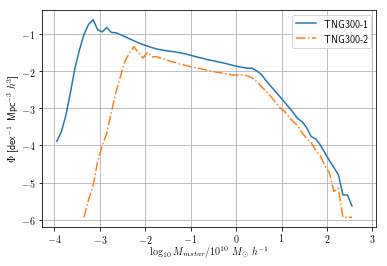

In [84]:
#plt.plot(center_mass_bins, np.log10(hist_lr/mass_delta))
#plt.plot(center_mass_bins, np.log10(hist_hr/mass_delta))
plt.plot(center_mass_bins, np.log10(hist_stellar_hr/mass_delta/(BoxSize/1000)**3), label='TNG300-1')
plt.plot(center_mass_bins, np.log10(hist_stellar_lr/mass_delta/(BoxSize/1000)**3), '-.', label='TNG300-2')
plt.xlabel("$\log_{10} M_{\rm{star}} / 10^{10}\ M_{\odot}\ h^{-1}$")
plt.ylabel("$\Phi$ [dex$^{-1}$ Mpc$^{-3}$ $h^{3}$]")
plt.legend()
plt.grid()

In [74]:
BoxSize

205000.0

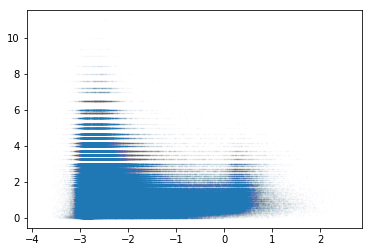

In [13]:
plt.scatter(np.log10(gal_formation_hires[:,4]), gal_formation_hires[:,3], s=1, alpha=0.01)